## 18. Loglinear Models

### 18.1 The Loglinear Model

Let $X = (X_1, \dots, X_m)$ be a random vector with probability

$$ f(x) = \mathbb{P}(X = x) = \mathbb{P}(X_1 = x_1, \dots, X_m = x_m) $$

Let $r_j$ be the number of values that $X_j$ takes; without loss of generality, assume $X_j \in \{ 0, 1, \dots, r_j - 1 \}$.  Suppose we have $n$ such vectors.

We can think of the data as a sample from a Multinomial with $N = r_1 \times r_2 \times \dots \times r_m$ categories.  The data can be represented as counts in a $r_1 \times r_2 \times \dots \times r_m$ table.  Let $p = \{ p_1, \dots, p_N \}$ denote the multinomial parameter.

Let $S = \{ 1, \dots, m \}$.  Given a vector $x = (x_1, \dots, x_m)$ and a subset $A \subset S$, let $x_A = (x_j : j \in A)$.  For example, if $A = \{1, 3\}$ then $x_A = (x_1, x_3)$.

**Theorem 18.1**.  The joint probability function $f(x)$ of a single random vector $X = (X_1, \dots, X_m)$ can be written as 

$$ \log f(x) = \sum_{A \subset S} \psi_A(x) $$

where the sum is over all subsets $A$ of $S = \{1, \dots, m \}$ and the $\psi$'s satisfy the following conditions:

1. $\psi_\varnothing(x)$ is a constant;
2. For every $A \subset S$, $\psi_A(x)$ is only a function of $x_A$ and not the rest of the $x_j$'s.
3. If $i \in A$ and $x_i = 0$, then $\psi_A(x) = 0$.

The formula in this theorem is known as the **log-linear expansion** of $f$.  Note that this is the probability function for a single draw.  Each $\psi_A(x)$ will depend on some unknown parameters $\beta_A$.  Let $\beta = (\beta_A : A \subset S)$ be the set of all these parameters.  We will write $f(x) = f(x; \beta)$ when we want to estimate the dependence on the unknown parameters $\beta$.

In terms of the multinomial, the parameter space is

$$ \mathcal{P} = \left\{ p = (p_1, \dots, p_N) : p_j \geq 0, \sum_{j=1}^N p_j = 1 \right\} $$

This is an $N - 1$ dimensional space.  In the log-linear representation, the parameter space is

$$ \Theta = \Bigg\{ \beta = (\beta_1, \dots, \beta_N) : \beta = \beta(p), p \in \mathcal{P} \Bigg\} $$

where $\beta(p)$ is the set of $\beta$ values associated with $p$.  The set $\Theta$ is a $N - 1$ dimensional surface in $\mathbb{R}^N$.  We can always go back and forth between the two parametrizations by writing $\beta = \beta(p)$ and $p = p(\beta)$.

**Theorem 18.14**.  Let $(X_a, X_b, X_c)$ be a partition of vectors $(X_1, \dots, X_m)$.  Then $X_b \text{ ⫫ } X_c \; | \; X_a$ if and only if all the $\psi$-terms in the log-linear expansion that have at least one coordinate in $b$ and one coordinate in $c$ are 0.

To prove this Theorem, we will use the following Lemma whose proof follows from the definition of conditional independence.

**Lemma 18.5**.  A partition $(X_a, X_b, X_c)$ satisfies $X_b \text{ ⫫ } X_c \; | \; X_a$ if and only if $(x_a, x_b, x_c) = g(x_a, x_b) h(x_a, x_c)$ for some functions $g$ and $h$.

**Proof of Theorem 18.14**.  Suppose that $\psi_t$ is 0 whenever $t$ has coordinates in $b$ and $c$.  Hence, $\psi_t$ is 0 if $t$ is not a subset of $a \cup b$ or $t$ is not a subset of $a \cup c$.  Therefore,

$$ \log f(x) = \sum_{t \subset a \cup b} \psi_t(x) + \sum_{t \subset a \cup c} \psi_t(x) - \sum_{t \subset a} \psi_t(x) $$

Exponentiating, we see that the joint density is of the form $g(x_a, x_b) h(x_a, x_c)$.  By Lemma 18.5, $X_b \text{ ⫫ } X_c \; | \; X_a$.  The converse follows by reversing the argument.

### 18.2 Graphical Log-Linear Models

Let $\log f(x) = \sum_{A \subset S} \psi_A(x)$ be a log-linear model.  Then $f$ is **graphical** if all $\psi$-terms are non-zero except for any pair of coordinates not in the edge set for some graph $\mathcal{G}$.  In other words, $\psi_A(x) = 0$ if and only if $\{i, j\} \subset A$ and $(i, j)$ is not an edge.

Here is a way to think about this definition: if you can add a term to the model and the graph does not change, then the model is not graphical.

### 18.3 Hierarchical Log-Linear Models

There is a set of log-linear models that is larger than the set of graphical models and that are used quite a bit.  These are hierarchical log-linear models.

A log-linear model is **hierarchical** if $\psi_a = 0$ and $a \subset t$ implies that $\psi_t = 0$.

**Lemma 18.9**.  A graphical model is hierarchical but the reverse need not be true.

### 18.4 Model Generators

Hierarchical models can be written succintly using **generators**.  This is most easily explained by example.  Suppose that $X = (X_1, X_2, X_3)$.  Then, $M = 1.2 + 1.3$ stands for:

$$ \log f = \psi_\varnothing + \psi_1 + \psi_2 + \psi_3 + \psi_{12} + \psi_{13}$$

The formula $M = 1.2 + 1.3$ says: "include $\psi_{12}$ and $\psi_{13}$".  We have to also include the lower terms or it won't be hierarchical.  The generator $M = 1.2.3$ is the **saturated** model

$$ \log f = \psi_\varnothing + \psi_1 + \psi_2 + \psi_3 + \psi_{12} + \psi_{13} + \psi_{23} + \psi_{123}$$

The saturated models corresponds to fitting and unconstrained multinomial.  Consider $M = 1 + 2 + 3$ which means

$$ \log f = \psi_\varnothing + \psi_1 + \psi_2 + \psi_3 $$

This is the mutual independence model.  Finally, consider $M = 1.2$ which has log-linear expansion

$$ \log f = \psi_\varnothing + \psi_1 + \psi_2 + \psi_{12} $$

This models makes $X_3 | X_2 = x_2, X_1 = x_1$ a uniform distribution.

### 18.5 Lattices

Hierarchical models can be organized into something called a **lattice**.  This is the set of all hierarchical models partially ordered by inclusion.  The set of all hierarchical models for two variables can be illustrated as in the figure below.

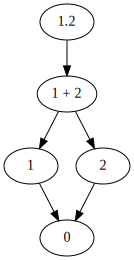

In [1]:
from graphviz import Digraph

d = Digraph()

d.edge('1.2', '1 + 2')
d.edge('1 + 2', '1')
d.edge('1 + 2', '2')
d.edge('1', '0')
d.edge('2', '0')

d

$M = 1.2$ is the saturated model, $M = 1 + 2$ is the independence model, $M = 1$ is the independence model plus $X_2 | X_1$ is uniform, $M = 2$ is the independence model plus $X_1 | X_2$ is uniform, $M = 0$ is the uniform distribution.

The lattice of trivariate models is shown in the figure below:

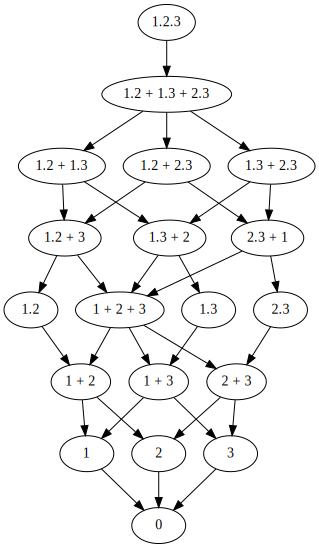

In [2]:
from graphviz import Digraph

d = Digraph()

d.edge('1.2.3', '1.2 + 1.3 + 2.3')

d.edge('1.2 + 1.3 + 2.3', '1.2 + 1.3')
d.edge('1.2 + 1.3 + 2.3', '1.2 + 2.3')
d.edge('1.2 + 1.3 + 2.3', '1.3 + 2.3')

d.edge('1.2 + 1.3', '1.2 + 3')
d.edge('1.2 + 2.3', '1.2 + 3')

d.edge('1.2 + 1.3', '1.3 + 2')
d.edge('1.3 + 2.3', '1.3 + 2')

d.edge('1.2 + 2.3', '2.3 + 1')
d.edge('1.3 + 2.3', '2.3 + 1')

d.edge('1.2 + 3', '1 + 2 + 3')
d.edge('1.3 + 2', '1 + 2 + 3')
d.edge('2.3 + 1', '1 + 2 + 3')

d.edge('1.2 + 3', '1.2')
d.edge('1.3 + 2', '1.3')
d.edge('2.3 + 1', '2.3')

d.edge('1.2', '1 + 2')
d.edge('1.3', '1 + 3')
d.edge('2.3', '2 + 3')

d.edge('1 + 2 + 3', '1 + 2')
d.edge('1 + 2 + 3', '1 + 3')
d.edge('1 + 2 + 3', '2 + 3')

d.edge('1 + 2', '1')
d.edge('1 + 2', '2')
d.edge('1 + 3', '1')
d.edge('1 + 3', '3')
d.edge('2 + 3', '2')
d.edge('2 + 3', '3')

d.edge('1', '0')
d.edge('2', '0')
d.edge('3', '0')

d

### 18.6 Fitting Log-Linear Models to Data

Let $\beta$ denote all the parameters in a log-linear model $M$.  The log-likelihood for $\beta$ is:

$$ \ell(\beta) = \sum_j x_j \log p_j(\beta) $$

where the sum is over the cells and $p(\beta)$ denotes the cell probabilities corresponding to $\beta$.  The MLE $\hat{\beta}$ generally has to be found numerically.  The model with all possible $\psi$-terms is called the  **saturated models**.  We can also fit any **sub-model** which corresponds to setting some subset of $\psi$ terms to 0.

For any submodel $M$, define the **deviance** $\text{dev}(M)$ by

$$ \text{dev}(M) = 2 (\hat{\ell}_\text{sat} - \hat{\ell}_M) $$

where $\ell_\text{sat}$ is the log-likelihood of the saturated model evaluated at the MLE and $\hat{\ell}_M$ is the log-likelihood of the model $M$ evaluated at its MLE.

**Theorem 18.14**.  The deviance is the likelihood test statistic for

$$
H_0 : \text{the model is } M
\quad \text{versus} \quad
H_1 : \text{the model is not } M
$$

Under $H_0$, $\text{dev}(M) \leadsto \chi^2_\nu$ with $\nu$ degrees of freedom equal to the difference in the number of parameters between the saturated model and $M$.

One way to find a good model is to use the deviance to test every sub-model.  Every model that is not rejected by this test is then considered a plausible model.  However, this is not a good strategy for two reasons.  First, we will end up doing many tests, which means there is ample opportunity for making Type I and Type II errors.  Second, we will end up using models where we failed to reject $H_0$.  But we might fail to reject $H_0$ due to low power.  The result is that we end up with a bad model just due to low power.

There are many model searching strategies.  A common approach is to use some form of *penalized likelihood*.  One version of penalized is the AIC that we used in regression.  For any model $M$ define

$$ \text{AIC}(M) = -2 \left( \hat{\ell}(M) - |M|\right) $$

where $|M|$ is the number of parameters.

Consider a set of models $\{ M_1, M_2, \dots \}$.  Let $\hat{f}_j(x)$ denote the estimated probability function obtained by using the maximum likelihood estimator of model $M_j$.  Thus, $\hat{f}_j(x) = \hat{f}(x; \hat{\beta}_j)$ where $\hat{\beta}_j$ is the MLE of the set of parameters $\beta_j$ for model $M_j$.  We will use the loss function $D(f, \hat{f})$ where

$$ D(f, g) = \sum_x f(x) \log \frac{f(x)}{g(x)} $$

is the Kullback-Leibler distance between two probability functions.  The corresponding risk function is $R(f, \hat{f}) = \mathbb{E}(D(f, \hat{f}))$.

Notice that $D(f, \hat{f})  = c - A(f, \hat{f})$ where $c = \sum_x f(x) \log f(x)$ does not depend on $\hat{f}$ and 

$$ A(f, \hat{f}) = \sum_x f(x) \log \hat{f}(x) $$

Thus minimizing the risk is equivalent to minimizing $a(f, \hat{f}) = \mathbb{E}(A(f, \hat{f}))$.

It is tempting to estimate $a(f, \hat{f})$ by $\sum_x \log \hat{f}(x)$ but, just as the training error in regression is highly biased estimate of prediction risk, it is also the case that $\sum_x \log \hat{f}(x)$ is a highly biased estimate of $a(f, \hat{f})$.  In fact, the bias is approximately equal to $|M_j|$.  Thus:

**Theorem 18.15**.  $\text{AIC}(M_j)$ is an approximately unbiased estimate of $a(f, \hat{f})$.

After finding a "best model" this way we can draw the corresponding graph.  We can also check the overall fit of the selected model using the deviance as described above.

### 18.8 Exercises